In [98]:
import pytorch_lightning as pl
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import cem.data.mnist_add as mnist
import cem.data.dsprites as dsprites

pl.seed_everything(42)
tsne = TSNE(n_components=2)
mnist.set_root_dir("../../../../datasets/mnist")
dsprites_permutation = np.load("../dsprites_permutation.npy")

Seed set to 42


# MNIST Two Binary Operands

In [122]:
mnist_two_operands_hidden_concept_ground_truth_clusters = mnist.train_dl(2, 2).dataset.tensors[2].numpy()[:, 0]
mnist_two_operands_data = np.load("mnist_two_digits.npz")
mnist_two_operands_embs = mnist_two_operands_data["embs"]
mnist_two_operands_c = mnist_two_operands_data["c"]

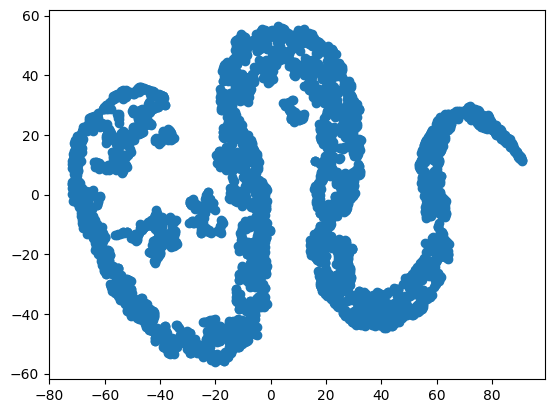

In [128]:
mnist_two_operands_embs_2d = tsne.fit_transform(mnist_two_operands_embs.squeeze()[mnist_two_operands_c == 0])
plt.scatter(mnist_two_operands_embs_2d[:, 0], mnist_two_operands_embs_2d[:, 1])
plt.show()

# MNIST Five Binary Operands

In [129]:
a = mnist.train_dl(5, 5).dataset.tensors[2].numpy()[:, (True, False, True, True, True)]
mnist_five_operands_hidden_concept_ground_truth_clusters = a.dot(1 << np.arange(a.shape[-1] - 1, -1, -1))
mnist_five_operands_data = np.load("mnist_five_digits.npz")
mnist_five_operands_embs = mnist_five_operands_data["embs"]
mnist_five_operands_c = mnist_five_operands_data["c"]

# MNIST Twenty Five Binary Operands

In [95]:
a = mnist.train_dl(25, 25).dataset.tensors[2].numpy()[:, (True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True)]
mnist_twenty_five_operands_hidden_concept_ground_truth_clusters = a.dot(1 << np.arange(a.shape[-1] - 1, -1, -1))

# DSPRITES

In [99]:
dsprites_train_dl, dsprites_val_dl, dsprites_test_dl = dsprites.load_dsprites(
    "quadrant_shape",
    "../../../../datasets/dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz",
    concepts_and_label=dsprites.quadrant_shape,
    permutation=dsprites_permutation
)

In [118]:
dsprites_hidden_concept_ground_truth_clusters = np.argmax(dsprites_train_dl.dataset.tensors[2][:, 4:].numpy(), axis=1)

In [119]:
dsprites_hidden_concept_ground_truth_clusters

array([0, 0, 0, ..., 1, 0, 0])

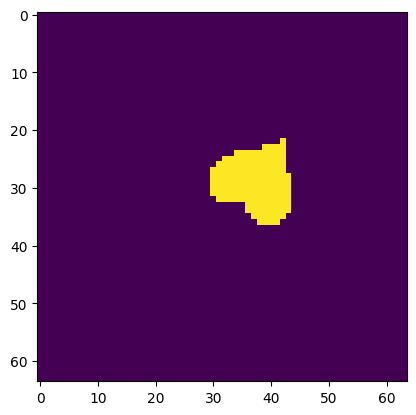

In [113]:
plt.imshow(dsprites_train_dl.dataset.tensors[0][9].squeeze())